## Minería de Datos (Master en Data Science, UIMP-UC) 
## Tarea 1. Variables Categóricas: Reglas de Asociación y Árboles de Clasificación
### [Profesores: Sixto Herrera y Rodrigo García]

En la presente tarea consideraremos el dataset `Mushroom`, incluido tanto en la La librería [arulesViz](https://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf) como en las diferentes plataformas descritas en el marco de la asignatura y en el GitHub dedicado a este Máster ([Mushroom](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/mushrooms.csv.)), para aplicar las diferentes técnicas vistas en el curso para variables categóricas: Reglas de Asociación y Árboles de Clasificación.

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

### Punto 1 (3 puntos):

Considerar uno de los algoritmos de asociación vistos en clase y obtener las reglas representativas del dataset fijando los parámetros de aprendizaje (soporte, confianza, etc...). Analizar los resultados en términos generales:
* ¿Cuantas reglas se han generado?
* ¿Existe alguna regla redundante?, ¿Cuántas?
* ¿Existe alguna regla que incluya la variable objetivo: `Class=edible` ó `Class=poisonous`?, ¿Cuantas?
* De cara a ser utilizada como modelo predictivo es adecuado que la variable objetivo se encuentre en el consecuente de la regla de asociación, ¿se da esta propiedad en alguna regla?
* Considerar los subconjuntos de reglas con ambas clases como consecuente e ilustrar las variables implicadas en cada caso. Considerar alguno de los grafos vistos para apoyar las conclusiones obtenidas.

NOTA: Usar soportes superiores a 0.1 para evitar problemas de memoria.

## Desarrollo Punto 1

Cargo las librerias necesarias y el dataset

In [107]:
library(arulesViz)
library(arules)
#library(tidyverse)

data(Mushroom)
str(Mushroom)

head(Mushroom@itemInfo)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:178360] 1 7 10 16 23 30 34 35 38 43 ...
  .. .. ..@ p       : int [1:8125] 0 22 45 68 90 112 135 158 180 202 ...
  .. .. ..@ Dim     : int [1:2] 114 8124
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	114 obs. of  3 variables:
  .. ..$ labels   : chr [1:114] "Class=edible" "Class=poisonous" "CapShape=bell" "CapShape=conical" ...
  .. ..$ variables: Factor w/ 23 levels "Bruises","CapColor",..: 5 5 3 3 3 3 3 3 4 4 ...
  .. ..$ levels   : Factor w/ 63 levels "almond","anise",..: 19 47 4 15 26 33 56 16 23 32 ...
  ..@ itemsetInfo:'data.frame':	8124 obs. of  0 variables


labels,variables,levels
<chr>,<fct>,<fct>
Class=edible,Class,edible
Class=poisonous,Class,poisonous
CapShape=bell,CapShape,bell
CapShape=conical,CapShape,conical
CapShape=flat,CapShape,flat
CapShape=knobbed,CapShape,knobbed


Imprimo un pequeño resumen de las variables disponibles y de sus posibles valores.

In [99]:
for (variable in levels(Mushroom@itemInfo$variables)){
    print(variable)
    for (level in levels(Mushroom@itemInfo$levels)){
        for (label in Mushroom@itemInfo$labels){
            if (grepl(variable, label) & grepl(level, label))
            print(paste("    ",level))
        }
    }
}

[1] "Bruises"
[1] "     bruises"
[1] "     no"
[1] "CapColor"
[1] "     brown"
[1] "     buff"
[1] "     cinnamon"
[1] "     gray"
[1] "     green"
[1] "     pink"
[1] "     purple"
[1] "     red"
[1] "     white"
[1] "     yellow"
[1] "CapShape"
[1] "     bell"
[1] "     conical"
[1] "     convex"
[1] "     flat"
[1] "     knobbed"
[1] "     no"
[1] "     sunken"
[1] "CapSurf"
[1] "     fibrous"
[1] "     grooves"
[1] "     scaly"
[1] "     smooth"
[1] "Class"
[1] "     edible"
[1] "     no"
[1] "     poisonous"
[1] "ColorAboveRing"
[1] "     brown"
[1] "     buff"
[1] "     cinnamon"
[1] "     gray"
[1] "     orange"
[1] "     pink"
[1] "     red"
[1] "     white"
[1] "     yellow"
[1] "ColorBelowRing"
[1] "     brown"
[1] "     buff"
[1] "     cinnamon"
[1] "     gray"
[1] "     orange"
[1] "     pink"
[1] "     red"
[1] "     white"
[1] "     yellow"
[1] "GillAttached"
[1] "     attached"
[1] "     free"
[1] "GillColor"
[1] "     black"
[1] "     brown"
[1] "     buff"
[1] "     ch

In [2]:
head(Mushroom)
print("----------------------")

transactions in sparse format with
 6 transactions (rows) and
 114 items (columns)

[1] "----------------------"


Transformo el dataset en un objeto *transactions* de arules

In [3]:
transactions <- as(Mushroom, "transactions")
transactions
print("----------------------")

transactions in sparse format with
 8124 transactions (rows) and
 114 items (columns)

[1] "----------------------"


Creo las reglas de asociación utilizando el metodo apriori, como implementado en la libreria arules.

Uso las siguientes restricciones para las reglas generadas:
- soporte (relativo) mínimo: 0.1;
- longitud mínima: 2;
- longitud máxima: 20.

In [4]:
rApriori <- apriori(transactions, parameter = list(support = 0.1, minlen = 2, maxlen = 20))
print("----------------------")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen target   ext
     20  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 done [4.17s].
writing ... [2560630 rule(s)] done [0.43s].
creating S4 object  ... done [1.40s].
[1] "----------------------"


In [5]:
iEclat <- eclat(transactions, parameter = list(support = 0.1, minlen = 2, maxlen = 20))
rEclat <- ruleInduction(iEclat, transactions, confidence = 0)

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE     0.1      2     20 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 812 

create itemset ... 
set transactions ...[114 item(s), 8124 transaction(s)] done [0.02s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating bit matrix ... [53 row(s), 8124 column(s)] done [0.00s].
writing  ... [379492 set(s)] done [0.30s].
Creating S4 object  ... done [0.14s].


Mirando al resumen del objeto rApriori, donde se guardan todas las reglas de acociación generadas, se observa que estas son:
- 2560630 en el caso apriori;
- 2995184 en el caso apriori;

In [6]:
summary(rApriori)
print("----------------------")

summary(rEclat)
print("----------------------")

set of 2560630 rules

rule length distribution (lhs + rhs):sizes
     2      3      4      5      6      7      8      9     10     11     12 
   331   4862  29136  99724 228717 384061 495449 501329 399135 247755 117473 
    13     14     15     16 
 41078   9975   1500    105 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   9.000   8.588  10.000  16.000 

summary of quality measures:
    support         confidence          lift            count     
 Min.   :0.1002   Min.   :0.8000   Min.   :0.8266   Min.   : 814  
 1st Qu.:0.1064   1st Qu.:1.0000   1st Qu.:1.0849   1st Qu.: 864  
 Median :0.1064   Median :1.0000   Median :1.6459   Median : 864  
 Mean   :0.1262   Mean   :0.9897   Mean   :1.7505   Mean   :1025  
 3rd Qu.:0.1231   3rd Qu.:1.0000   3rd Qu.:2.1515   3rd Qu.:1000  
 Max.   :0.9754   Max.   :1.0000   Max.   :6.8718   Max.   :7924  

mining info:
         data ntransactions support confidence
 transactions          8124     0.1        0.8

[1] "----------------------"


set of 2995184 rules

rule length distribution (lhs + rhs):sizes
     2      3      4      5      6      7      8      9     10     11     12 
  1376  11835  52436 147540 297354 460873 568128 560862 440150 270556 127356 
    13     14     15     16 
 44291  10710   1605    112 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   8.429  10.000  16.000 

summary of quality measures:
    support         confidence          lift           itemset      
 Min.   :0.1002   Min.   :0.1019   Min.   :0.3794   Min.   :     1  
 1st Qu.:0.1064   1st Qu.:0.9818   1st Qu.:1.0849   1st Qu.: 96553  
 Median :0.1064   Median :1.0000   Median :1.6014   Median :189540  
 Mean   :0.1253   Mean   :0.9238   Mean   :1.7232   Mean   :188140  
 3rd Qu.:0.1182   3rd Qu.:1.0000   3rd Qu.:2.0746   3rd Qu.:280433  
 Max.   :0.9754   Max.   :1.0000   Max.   :6.8718   Max.   :379492  

mining info:
         data ntransactions support confidence
 transactions          8124     0.1          0

[1] "----------------------"


Dos reglas se dicen redundantes (entre si) cuando aportan la misma información.

Más en detalle, dos reglas se consideran redundantes si:
- involucran los mismos items, que pero aparecen con distintos roles (antecedente y consecuente);
- tienen la misma confianza y el mismo lift.

Podemos encontrar las reglas redundantes con el comando *is.redundant* de r.

In [7]:
# Algoritmo apriori
indRedundant.apriori <- which(is.redundant(rApriori))
length(indRedundant.apriori)
length(indRedundant.apriori) / length(rApriori) #2560630
length(rApriori) - length(indRedundant.apriori)

# Algoritmo eclat
indRedundant.eclat <- which(is.redundant(rEclat))
length(indRedundant.eclat)
length(indRedundant.eclat) / length(rEclat) #2995184
length(rEclat) - length(indRedundant.eclat)

[1] 2552650

[1] 0.9968836

[1] 7980

[1] 2977548

[1] 0.9941119

[1] 17636

La casi totalidad de la reglas de asociación resulta ser redundante:
- 2552650 de 2560630 (99.7 %) en el caso apriori;
- 2977548 de 2995184 (99.4 %) en el caso eclat.

Podemos quedarnos con la pequeña fracción de reglas no redundantes:
- 7980 en el caso apriori;
- 17636 en el caso eclat.

In [8]:
rAprioriFiltered <- rApriori[!is.redundant(rApriori)]
rAprioriFiltered

rEclatFiltered <- rEclat[!is.redundant(rEclat)]
rEclatFiltered

set of 7980 rules 

set of 17636 rules 

De esas, las que involucran la variable "Class=poisonus", son:
- 183 para el metodo apriori como consecuente;
- 577 para el metodo apriori como antecedente;
- 299 para el metodo eclat como consecuente;
- 1297 para el metodo eclat como antecedente;

In [109]:
rhs.poisonous.apriori <- subset(rAprioriFiltered, subset = rhs %in% c("Class=poisonous"))
length(subset(rAprioriFiltered, subset = rhs %in% c("Class=poisonous")))

[1] 183

In [67]:
length(subset(rAprioriFiltered, subset = lhs %in% c("Class=poisonous")))

[1] 577

In [68]:
rhs.poisonous.eclat <- subset(rEclatFiltered, subset = rhs %in% c("Class=poisonous"))
length(subset(rEclatFiltered, subset = rhs %in% c("Class=poisonous")))

[1] 299

In [69]:
length(subset(rEclatFiltered, subset = lhs %in% c("Class=poisonous")))

[1] 1297

De esas, las que involucran la variable "Class=edible", son:
- 353 para el metodo apriori como consecuente;
- 1355 para el metodo apriori como antecedente;
- 458 para el metodo eclat como consecuente;
- 3013 para el metodo eclat como antecedente;

In [71]:
rhs.edible.apriori <- subset(rAprioriFiltered, subset = rhs %in% c("Class=edible"))
length(subset(rAprioriFiltered, subset = rhs %in% c("Class=edible")))

[1] 353

In [72]:
length(subset(rAprioriFiltered, subset = lhs %in% c("Class=edible")))

[1] 1355

In [73]:
rhs.edible.eclat <- subset(rEclatFiltered, subset = rhs %in% c("Class=edible"))
length(subset(rEclatFiltered, subset = rhs %in% c("Class=edible")))

[1] 458

In [74]:
length(subset(rEclatFiltered, subset = lhs %in% c("Class=edible")))

[1] 3013

Inspeccionamos ahora más en detalle los subconjuntos de reglas que tengan las dos clases objetivo como consecuente:
- Class=edible;
- Class=poisonous.

In [77]:
inspect(head(sort(rhs.edible.apriori, by ="lift"),10))

     lhs                      rhs              support confidence     lift count
[1]  {GillSize=broad,                                                           
      GillColor=brown}     => {Class=edible} 0.1083210          1 1.930608   880
[2]  {Odor=none,                                                                
      StalkRoot=equal}     => {Class=edible} 0.1063516          1 1.930608   864
[3]  {Bruises=no,                                                               
      StalkRoot=equal}     => {Class=edible} 0.1063516          1 1.930608   864
[4]  {GillSpace=crowded,                                                        
      Habitat=grasses}     => {Class=edible} 0.1299852          1 1.930608  1056
[5]  {GillSpace=crowded,                                                        
      StalkShape=tapering} => {Class=edible} 0.1063516          1 1.930608   864
[6]  {GillSpace=crowded,                                                        
      GillSize=broad}      =

In [78]:
inspect(head(sort(rhs.poisonous.apriori, by ="lift"),10))

     lhs                         rhs                 support confidence     lift count
[1]  {RingType=large}         => {Class=poisonous} 0.1595273          1 2.074566  1296
[2]  {GillColor=buff}         => {Class=poisonous} 0.2127031          1 2.074566  1728
[3]  {Odor=foul}              => {Class=poisonous} 0.2658789          1 2.074566  2160
[4]  {CapColor=red,                                                                   
      GillSize=narrow}        => {Class=poisonous} 0.1063516          1 2.074566   864
[5]  {CapColor=red,                                                                   
      Bruises=no}             => {Class=poisonous} 0.1078287          1 2.074566   876
[6]  {SurfaceBelowRing=silky,                                                         
      Spore=chocolate}        => {Class=poisonous} 0.1595273          1 2.074566  1296
[7]  {SurfaceAboveRing=silky,                                                         
      Spore=chocolate}        => {Class=poi

Mirando a los plots de confianza, soporte y lift, parece que confianza y lift, en este caso, son correlacionados (alta confianza ~ alto lift).

Nos podemos quedar entonces con as reglas de asociación más interesante requierendo que la confianza sea alta. 

De esta manera, va a ser posible dibujar grafos con flechas que enseñen cuales son las variables más importantes para identificar si una seta es comestible o venenosa, sin que estos sean demasiado cargados de información.

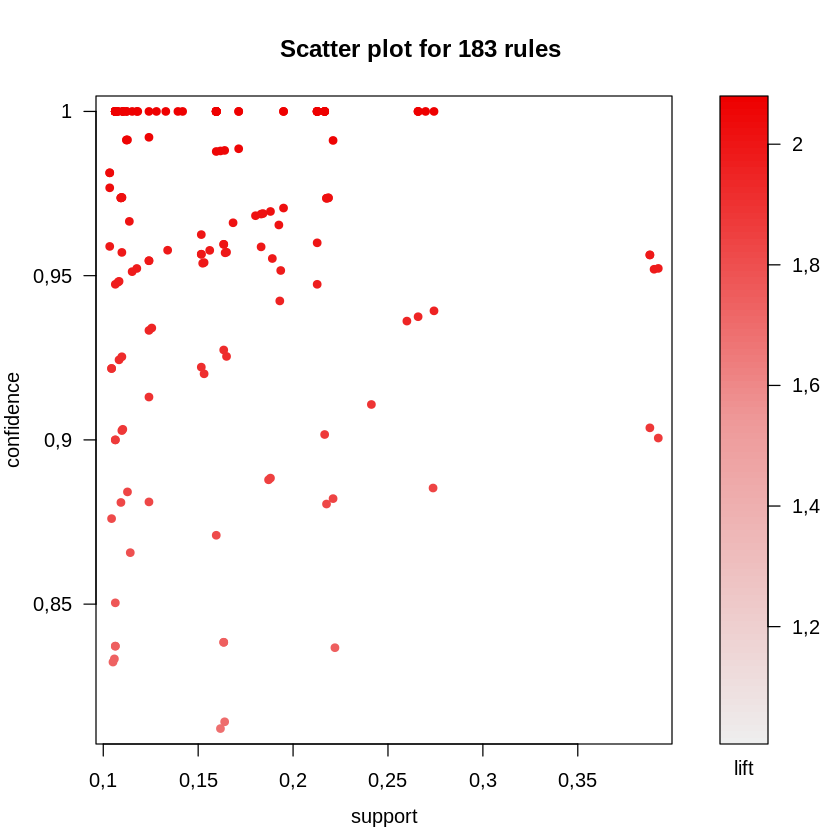

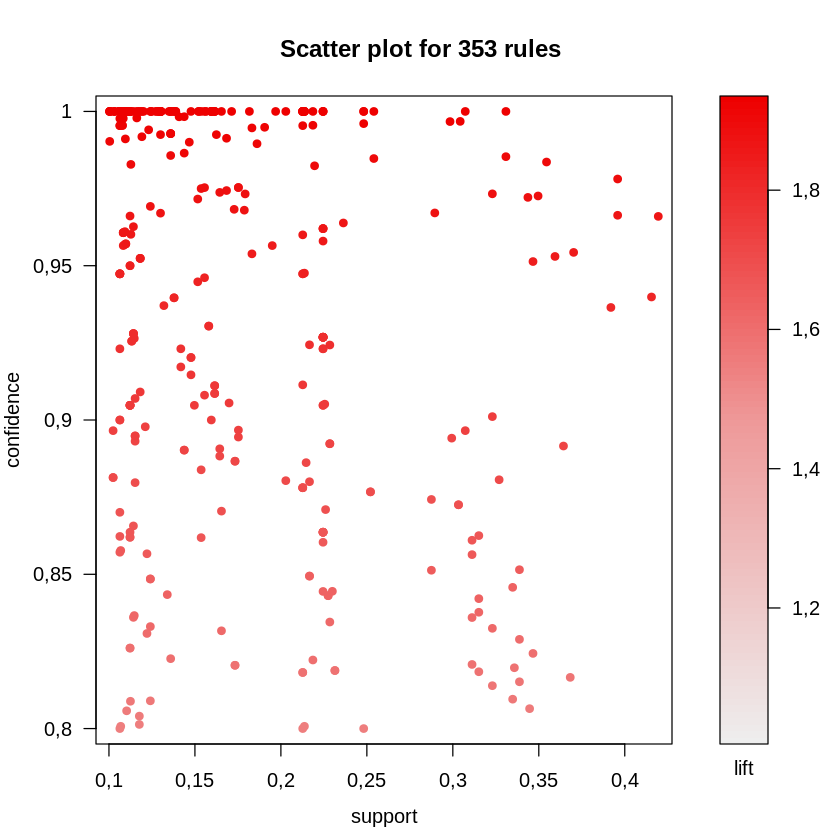

In [124]:
par(mfrow=c(1,2)) 

plot.1 <- plot(rhs.poisonous.apriori, jitter = 0)
plot.2 <- plot(rhs.edible.apriori, jitter = 0)

Seleccionando solo las reglas con alta confianza y subiendo ligeramente el soporte minimo, logramos obtener las reglas más fiables para distinguir setas:
- rojo más fuerte: seta venenosa;
- rojo más suave: seta comestible.

Se puede observar en el grafo de abajo que las reglas que apuntan a clases distintas, tipicamente no tienen variables en común, como hay que esperar si las reglas son fiables.

Además, cuando las mismas variables (e.g. SurfaceAboveRing) aparecen en reglas para seleccionar setas venenosas o comestibles, lo hacen con valores distintos:
- SurfaceAboveRing = silky --> venenoso;
- SurfaceAboveRing = smooth --> comestible.

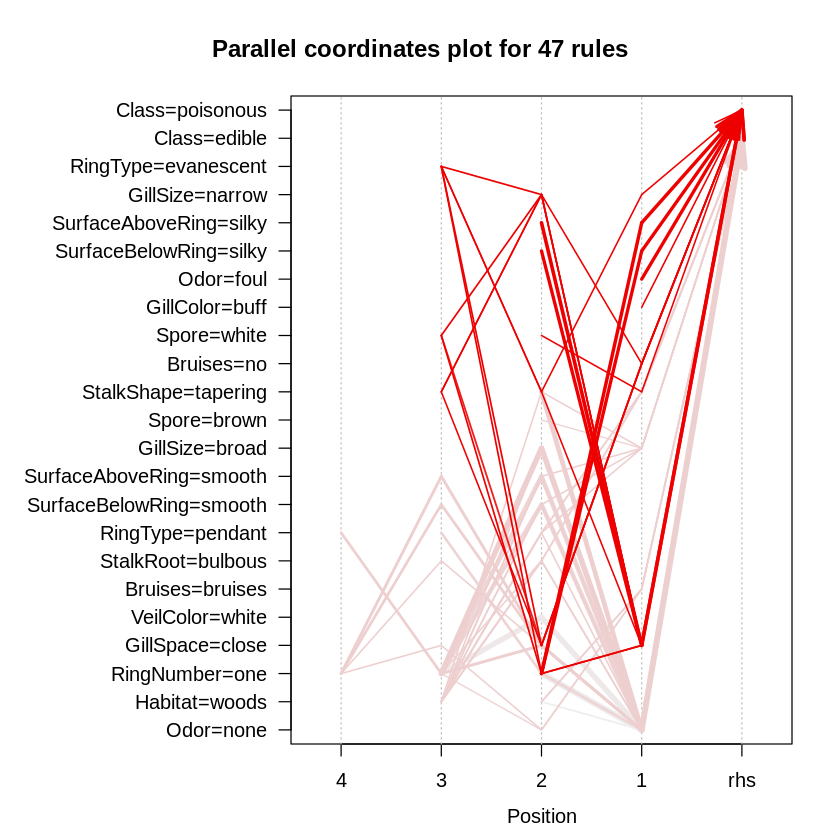

In [138]:
rAprioriClasses <- subset(rAprioriFiltered, subset = rhs %in% c("Class=edible") | rhs %in% c("Class=poisonous"))

rApriori.high.conf <- subset(rAprioriClasses, subset = confidence > 0.98 & support > 0.2)
plot(rApriori.high.conf, method="paracoord")

### Punto 2 (4 puntos):

En este apartado aplicaremos árboles de clasificación para obtener un modelo que permita clasificar una nueva entrada. Para ello, vamos a utilizaremos el paquete `CaReT`. Este paquete (y los demás que hemos visto para trabajar con árboles en `R`) no aceptan objetos del tipo `transactions` como los del apartado anterior. Por tanto, hemos preparado un fichero *csv* con el dataset *Mushrooms*; puedes descargarlo desde esta aquí:
https://github.com/SantanderMetGroup/Master-Data-Science/tree/master/Data_mining/datasets. Lee el dataset con la función `read.csv`.  
Ahora ya tenemos un data.frame con el que podemos empezar a trabajar. En primer lugar tendremos que eliminar la columna 17 (`veil.type`), ya que contiene un único nivel y daría errores en `CaReT`(esta columna podría eliminarse también en el caso de las reglas de asociación ya que no aporta información al dataset).  
Nuestro objetivo será encontrar la configuración (profundidad) óptima del árbol. Para ello, partiremos el dataset en dos subconjuntos indpendedientes de train y test (75% y 25% del total, respectivamente). Sobre el dataset de train, aplicaremos una cross-validación con 3 folds y la repetiremos 50 veces (recuerda que los árboles son sensibles a la partición train/test que se considere). 

* ¿Cuál es la configuración óptima del árbol? ¿Hay alguna diferencia entre el árbol *completo* y el óptimo? ¿Por qué crees que ocurre esto?
* ¿Cuáles son las dos variables que mayor peso tienen a la hora de clasificar? Entrena un nuevo árbol considerando como predictores únicamente esas dos variables. ¿Qué resultados obtienes? 
* Entrena un nuevo árbol considerando como predictores cualesquiera otras dos variables que no sean las utilizadas en la pregunta anterior. ¿Cuál es el error de test de este árbol?

### Punto 3 (3 puntos):

Por un lado, las ramas del árbol pueden ser interpretadas como reglas de forma similar a las obtenidas por el algoritmo de reglas aplicado. Por ejemplo, en el caso del árbol obtenido con el dataset `Play Tennis` puede obtenerse las siguientes `reglas`: SI Outlook = Overcast -> Play Tennis = Yes ó SI (Outlook = Sunny) AND (Humidity = Normal) -> Play Tennis = Yes, cuya confianza asociada viene dada por la frecuencia relativa de cada caso en esa rama del árbol. Por otro lado, considerando las reglas que implican a nuestra variable objetivo tendríamos un `modelo` similar al dado por el árbol. Considerar y comparar ambas aproximaciones (p.e. ¿coinciden los antecedentes de las reglas? ¿alguna de las variables más frecuentes como antecedente en las reglas se corresponde con alguna de las variables con mayor capacidad de discriminación? etc.). 